## Week2 - Neural Network Basics
### Topics
* How to avoid for loops in python programming for neural networks ?
* What is forward propogation and back propgation ?
* Understanding forward and backward propogation using logistic regression
* Understanding derivatives and computation graph
* Understanding a simple neural network using derivatives and computation graph

#### Logistic regression as neural network

##### Binary classification
Given an input image of cat, the ability to determine if its a cat (1) or not cat(0) is an example of binary classification. Logistic regression is one of the algorithms for binary classification

Any image is composed of Red(R), Blue(B), Green(G) and the intensity of these values can be defined as vectors. Refer example below

![](https://raw.githubusercontent.com/AgitatedBuddha/handsonml_nn_dl/main/dl/images/RGB.png)

A typical 64(height)x64(width) image, then has 3x64x64 values. These values can be represented as matrices. This is the input given to the alogrithm and is called as feature vector, denoted by X. Dimension of input feature vector X denoted by $N_x$, in this example $N_x$ = 64 * 64 * 3 = 12288. The output is denoted by Y and for binary classification its usually 0 or 1. 

**Notation 1** <br>
\begin{align}
X &\in N_x  \\
Y &\in \{0,1\}
\end{align}

**Notation 2** <br>
Input data is divided into training and test samples. Training data samples are denoted by *m* .These can be refered as m_{train} and also as m_{test}. A set consist of both input and output
\begin{align}
m_{train} = {(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}) ... , (x^{(m)},y^{(m)})}
\end{align}

**Notation 3** <br>
All training examples are represented via the following matrix notations
$$ X = \begin{bmatrix} | & | & | & .. & | \\  .. & .. & .. & .. & .. \\ x^{(1)} & x^{(2)} & .. & .. & x^{(m)} \\ .. & .. & .. & ..& .. \\ | & | & | & .. & | \end{bmatrix} ; \ \ \ Y = \begin{bmatrix} y^{(1)} & y^{(2)} & .. & y^{(m)} \end{bmatrix}$$

Python commands : X.shape = $(N_x, m)$ i.e $N_x$ rows and m columns $ and Y.shape = (1,m) i.e 1 row and m columns

##### Logistic Regression
Given x as input, the logistic regression predicts $\hat{y}$. $\hat{y}$ is the probability of y=1 given x i.e $\hat{y} = P(y=1|x)$. The parameters that help us in determining $\hat{y}$ and *w* and *b* . In Binary classification $ 0 <= \hat{y} <= 1 $, but what if the values of w and b are high, so we use a non-linear function called sigmoid function.<br>

Sigmoid function
\begin{align}
\sigma = \frac{1}{1+e^{(-z)}}
\end{align}

Now, the equation is given as 
\begin{align}
\hat{y} = \sigma (W^t . x + b) \ or \ \hat{y} = \sigma (z) , where \ z = (W^t . x + b)
\end{align}

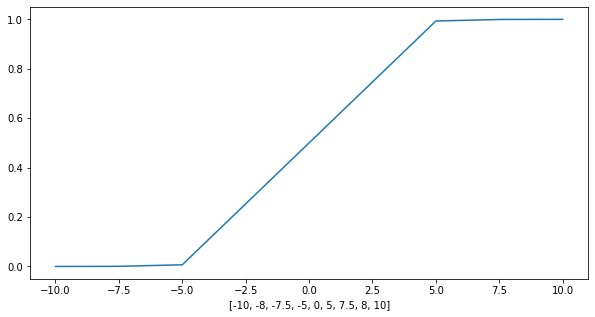

In [21]:
# simple code to plot sigmoid function
import matplotlib.pyplot as plt
import math

def sigmoid(x):
  return 1/(1 + math.exp(-x))

x=[-10, -8 , -7.5, -5, 0, 5, 7.5, 8, 10]
y = []
for item in x:
    y.append(sigmoid(item))

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel(x, fontsize = 10)
plt.show()

##### Logistic Regression Cost function

##### What is loss function ?
Logistic regression aims to predict and keep $\hat{y}$ as close to y as possible. The gap between this predicted and actual value for $i^{(th)}$ sample is called loss.<br><br>
For a given <br>
$((x^{(1)},y^{(1)}),(x^{(2)},y^{(2)})...(x^{(m)},y^{(m)}))$ we want $\hat{y}^{(i)} =~ y^{(i)}$. We achieve the same by keeping i.e $L(\hat{y},y)$ to the minimum.<br><br>
Loss function is defined as 
\begin{align}
L(\hat{y},y) = - ( y \,\, log\,\hat{y} +  (1 - y) \,\, log (1 - \hat{y}) )
\end{align}

The simple intuition behind the above formula is, <br>
If y=1 , then $L(\hat{y},y) = -y \,\, log \hat{y}$ ; Loss must be as small as possible, meaning $log\,\hat{y}$ or $\hat{y}$ must be very large. Since we have a sigmoid function the largest value $\hat{y}$ can have is close to 1; there by $\hat{y}$ =~ y <br><br>
If y=0 , then $L(\hat{y},y) = - log (1 - \hat{y})$ ; Loss must be as small as possible, meaning $log (1 - \hat{y})$ must be very large or $\hat{y}$ must be small. Since we have a sigmoid function the smallest value $\hat{y}$ can have is close to 0; there by $\hat{y}$ =~ y

##### What is cost function ?
The sum of all losses over m samples is the cost we pay for the algorithm for being inaccurate and is usually denoted by J
\begin{align}
J( w, b ) = \frac{1}{m} \sum_{j=1}^{m} L(\hat{y}^{(i)},y^{(i)})
\,\,\,= - \frac{1}{m} \sum_{j=1}^{m} ( y^{(i)} \,\,\, log \,\hat{y}^{(i)} +  (1 - y^{(i)}) \,\,\, log (1 - \hat{y}^{(i)}) )
\end{align}